In [8]:
import pandas as pd
import seaborn as sns


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [18]:
df= pd.read_csv(r"C:\Users\nddha\OneDrive\Desktop\ML\Data\Mall Customers.csv").iloc[:,2:5]
df

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


<Axes: xlabel='annual_income', ylabel='spending_score'>

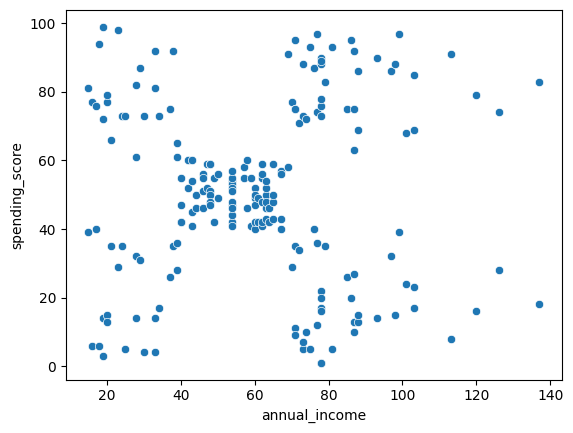

In [6]:
sns.scatterplot(data= df, x="annual_income", y="spending_score")

In [16]:
import scipy.cluster.hierarchy as sch

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [75.0, 75.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [87.5, 87.5, 132.5, 132.5],
  [65.0, 65.0, 110.0, 110.0],
  [21.875, 21.875, 87.5, 87.5],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [54.6875, 54.6875, 171.25, 171.25],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [270.0, 270.0, 293.75, 293.75],
  [255.0, 255.0, 281.875, 281.875],
  [325.0, 325.0, 335.0, 335.0],
  [268.4375, 268.4375, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [435.0, 43

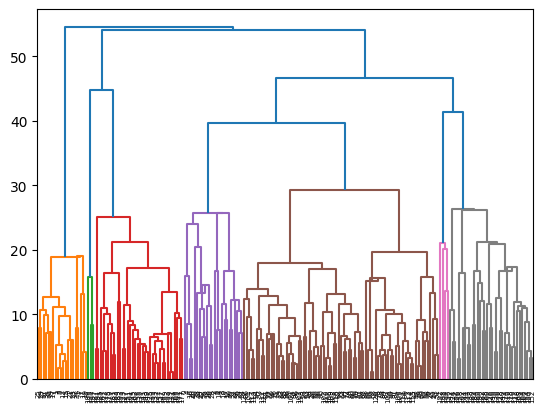

In [19]:
sch.dendrogram(sch.linkage(df, method="centroid", metric="euclidean"))

In [21]:
hc= AgglomerativeClustering(n_clusters=7, metric="manhattan",  linkage="average")
hc

,n_clusters,7
,metric,'manhattan'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'average'
,distance_threshold,None
,compute_distances,False


In [22]:
hc.fit(df)

,n_clusters,7
,metric,'manhattan'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'average'
,distance_threshold,None
,compute_distances,False


In [23]:
label=hc.fit_predict(df)

In [24]:
label

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 5, 2, 5,
       2, 5])

In [25]:
df["cluster"]= label

In [31]:
centroids = df.groupby('cluster')[['annual_income','spending_score']].mean()
print(centroids)

         annual_income  spending_score
cluster                               
0            26.304348       20.913043
1            54.087500       50.350000
2           109.700000       22.000000
3            24.950000       81.000000
4            78.892857       17.428571
5           127.666667       78.666667
6            83.111111       82.416667


In [26]:
df

,age,annual_income,spending_score,cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,5
196,45,126,28,2
197,32,126,74,5
198,32,137,18,2


<Axes: xlabel='annual_income', ylabel='spending_score'>

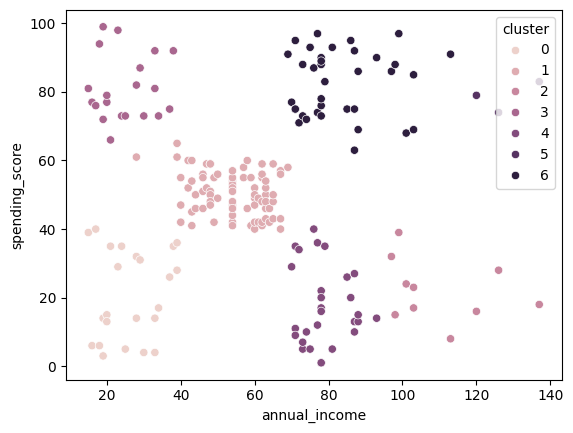

In [29]:
sns.scatterplot(data=df, x="annual_income", y="spending_score",  hue="cluster")

In [10]:
X = df[['annual_income','spending_score']].values


In [11]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [12]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = model.fit_predict(X_scaled)

df['Cluster'] = labels

KeyError: 'Cluster'

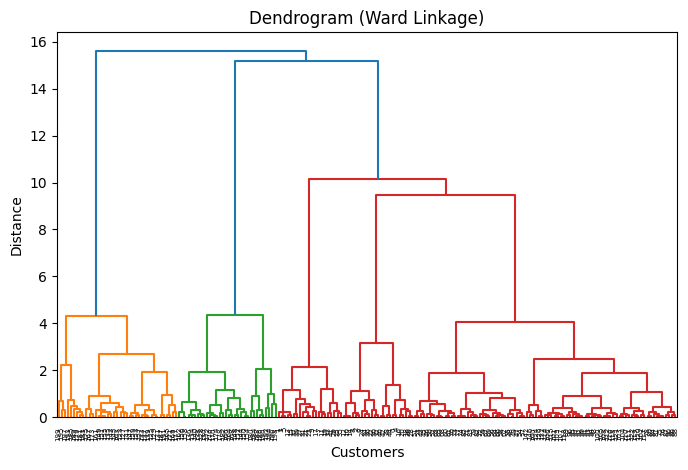

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(8,5))
dendrogram(Z)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

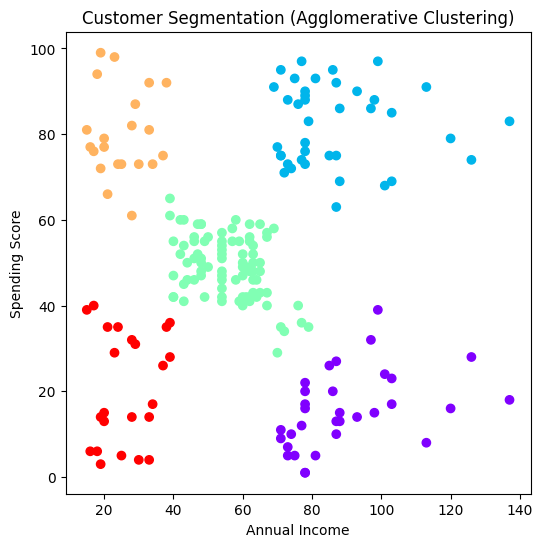

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation (Agglomerative Clustering)")
plt.show()